<a href="https://colab.research.google.com/github/sangamesh04patil/Samsung/blob/main/ProjectSangamesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name: Sangamesh
#USN: 1AJ22CS138
#College: Cambridge Institue Of Technology North Campus
#E-mail: sangameshdilipatil81@gmail.com
#Project: Credit Score Analysis and Prediction

#Credict Score Prediction And Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Data Importing And Data Information

In [ ]:
df=pd.read_csv('/content/sample_data/credit_risk.csv')

In [ ]:
df.shape

(1000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   annual_income_usd       947 non-null    float64
 1   outstanding_debt_usd    963 non-null    float64
 2   missed_payments         950 non-null    float64
 3   employment_status       955 non-null    object 
 4   employment_years        951 non-null    float64
 5   credit_history_years    940 non-null    float64
 6   number_of_credit_cards  954 non-null    float64
 7   loan_types              719 non-null    object 
 8   marital_status          956 non-null    object 
 9   dependents              953 non-null    float64
 10  education_level         951 non-null    object 
 11  residence_type          951 non-null    object 
 12  savings_balance         966 non-null    float64
 13  age                     948 non-null    float64
 14  credit_score            953 non-null    f

In [ ]:
df.head()

,annual_income_usd,outstanding_debt_usd,missed_payments,employment_status,employment_years,credit_history_years,number_of_credit_cards,loan_types,marital_status,dependents,education_level,residence_type,savings_balance,age,credit_score
0,81575.064135,75798.529073,11.0,Unemployed,15.045507,14.823965,0.0,NaN,Married,5.0,High School,Other,122291.420060,25.0,318.0
1,224576.939272,54977.750739,3.0,Retired,4.659337,NaN,7.0,NaN,Single,2.0,Master,Rent,169646.496934,72.0,388.0
2,168983.904296,29672.932952,12.0,NaN,35.675024,28.809400,5.0,NaN,Married,2.0,Bachelor,Own,NaN,47.0,452.0
3,49213.952130,86180.415372,8.0,Unemployed,NaN,6.945939,9.0,Auto Only,Single,2.0,NaN,Rent,185629.039573,24.0,798.0
4,48161.674164,91736.175469,12.0,Self-Employed,8.290977,13.201422,1.0,NaN,Single,4.0,Master,Rent,6437.937004,67.0,381.0


In [ ]:
print("THE AVERAGE AGE OF IN THIS DATA SET IS",df['age'].mean())

THE AVERAGE AGE OF IN THIS DATA SET IS 46.59915611814346


In [ ]:
print("MOST PEOPLE HAS",int(df['number_of_credit_cards'].mode()[0]),'NUMBER OF CARDS')

MOST PEOPLE HAS 6 NUMBER OF CARDS


In [ ]:
print(f"THE AVERAGE SAVINGS BALANCE OF THE DATASET IS:{(df['savings_balance'].mean()):.2f}")

THE AVERAGE SAVINGS BALANCE OF THE DATASET IS:102560.45


In [ ]:
print(f"THE MINIMUM EMPLOYEMENT YEARS IS:{(min(df['employment_years'])):.2f}\nTHE MAXIMUM EMPLOYEMENT YEARS IS:{max(df['employment_years']):.2f}")

THE MINIMUM EMPLOYEMENT YEARS IS:0.03
THE MAXIMUM EMPLOYEMENT YEARS IS:39.83


In [ ]:
print("THE MOST OF PEOPLE HAS A MARITAL STATUS OF:",df['marital_status'].mode()[0])

THE MOST OF PEOPLE HAS A MARITAL STATUS OF: Single


##Data Preprocessing/Cleaning

**Finding All The Null Values**

In [ ]:
df['age'].isna().sum()

np.int64(52)

In [ ]:
df['annual_income_usd'].isna().sum()

np.int64(53)

In [ ]:
df['credit_history_years'].isna().sum()

np.int64(60)

In [ ]:
df['loan_types'].isna().sum()

np.int64(281)

In [ ]:
df.isna().sum()

,0
annual_income_usd,53
outstanding_debt_usd,37
missed_payments,50
employment_status,45
employment_years,49
credit_history_years,60
number_of_credit_cards,46
loan_types,281
marital_status,44
dependents,47


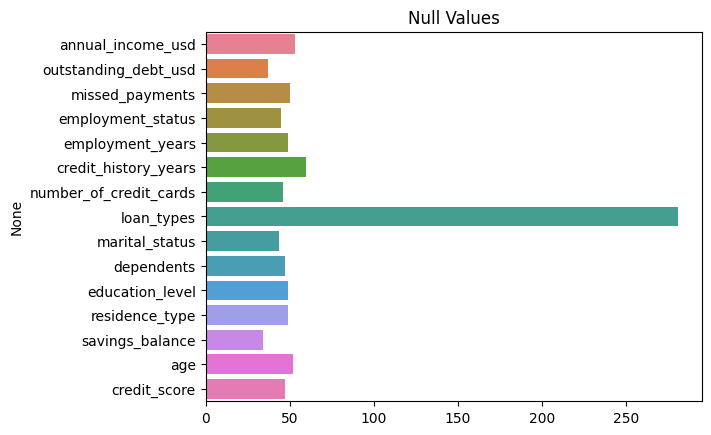

In [ ]:
sns.barplot(x=df.isna().sum().values,y=df.isna().sum().index,hue=df.isna().sum().index)
plt.title("Null Values")
plt.show()

**Filling Na Values**

In [ ]:
df.columns

Index(['annual_income_usd', 'outstanding_debt_usd', 'missed_payments',
       'employment_status', 'employment_years', 'credit_history_years',
       'number_of_credit_cards', 'loan_types', 'marital_status', 'dependents',
       'education_level', 'residence_type', 'savings_balance', 'age',
       'credit_score'],
      dtype='object')

In [ ]:
avg_annual_income=df['annual_income_usd'].mean()
avg_annual_income

np.float64(158825.4928469367)

In [ ]:
df['annual_income_usd']=df['annual_income_usd'].fillna(avg_annual_income)
df['annual_income_usd'].isna().sum()

np.int64(0)

In [ ]:
print(df['annual_income_usd'].isna().sum())

0


In [ ]:
avr_outstading=df['outstanding_debt_usd'].mean()
avr_outstading

np.float64(75482.6210010108)

In [ ]:
df['outstanding_debt_usd']=df['outstanding_debt_usd'].fillna(avr_outstading)
df['outstanding_debt_usd'].isna().sum()

np.int64(0)

In [ ]:
avr_missed=df['missed_payments'].mean()
avr_missed

np.float64(7.112631578947369)

In [ ]:
df['missed_payments']=df['missed_payments'].fillna(avr_missed)
df['missed_payments'].isna().sum()

np.int64(0)

In [ ]:
avr_empl_stat=df['employment_status'].mode()[0]
avr_empl_stat

'Employed'

In [ ]:
df['employment_status']=df['employment_status'].fillna(avr_empl_stat)
df['employment_status'].isna().sum()

np.int64(0)

In [ ]:
avr_emp_yr=df['employment_years'].mean()
avr_emp_yr

np.float64(19.91327926344634)

In [ ]:
df['employment_years']=df['employment_years'].fillna(avr_emp_yr)
df['employment_years'].isna().sum()

np.int64(0)

In [ ]:
avr_cred_his=df['credit_history_years'].mean()
avr_cred_his

np.float64(14.945120425714487)

In [ ]:
df['credit_history_years']=df['credit_history_years'].fillna(avr_cred_his)
df['credit_history_years'].isna().sum()

np.int64(0)

In [ ]:
avr_no_of_cred=df['number_of_credit_cards'].mean()
avr_no_of_cred

np.float64(4.513626834381552)

In [ ]:
df['number_of_credit_cards']=df['number_of_credit_cards'].fillna(avr_no_of_cred)
df['number_of_credit_cards'].isna().sum()

np.int64(0)

In [ ]:
avr_loan_type=df['loan_types'].mode()[0]
avr_loan_type

'Mortgage Only'

In [ ]:
df['loan_types']=df['loan_types'].fillna(avr_loan_type)
df['loan_types'].isna().sum()

np.int64(0)

In [ ]:
avr_mar_stat=df['marital_status'].mode()[0]
avr_mar_stat

'Single'

In [ ]:
df['marital_status']=df['marital_status'].fillna(avr_mar_stat)
df['marital_status'].isna().sum()

np.int64(0)

In [ ]:
avr_dep=df['dependents'].mean()
avr_dep

np.float64(2.386149003147954)

In [ ]:
df['dependents']=df['dependents'].fillna(avr_dep)
df['dependents'].isna().sum()

np.int64(0)

In [ ]:
avr_edu_lvl=df['education_level'].mode()[0]
avr_edu_lvl

'High School'

In [ ]:
df['education_level']=df['education_level'].fillna(avr_edu_lvl)
df['education_level'].isna().sum()

np.int64(0)

In [ ]:
avr_res_type=df['residence_type'].mode()[0]
avr_res_type

'Other'

In [ ]:
df['residence_type']=df['residence_type'].fillna(avr_res_type)
df['residence_type'].isna().sum()

np.int64(0)

In [ ]:
df['savings_balance']=df['savings_balance'].fillna(df['savings_balance'].mean())
df['savings_balance'].isna().sum()

np.int64(0)

In [ ]:
df['age']=df['age'].fillna(df['age'].mean())
df['age'].isna().sum()

np.int64(0)

In [ ]:
df['credit_score']=df['credit_score'].fillna(df['credit_score'].mean())
df['credit_score'].isna().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
annual_income_usd,0
outstanding_debt_usd,0
missed_payments,0
employment_status,0
employment_years,0
credit_history_years,0
number_of_credit_cards,0
loan_types,0
marital_status,0
dependents,0


#Graphs

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Graph Showing Credit Score With The Count !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


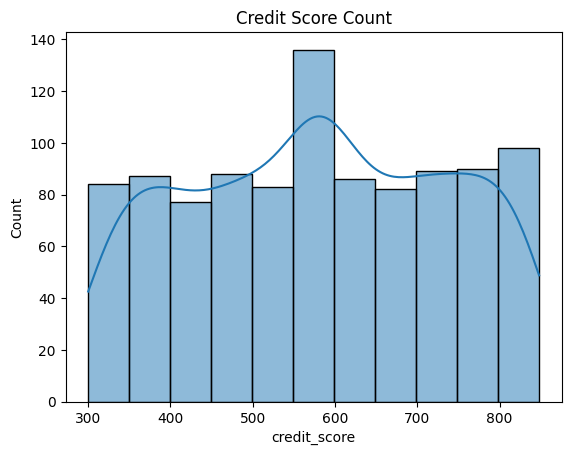

In [ ]:
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Graph Showing Credit Score With The Count !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
sns.histplot(df['credit_score'],kde=True)
plt.title("Credit Score Count")
plt.show()

In [ ]:
df_test=df.copy()
bins = list(range(0, 101, 10))
labels = [f"{i}-{i+10}" for i in range(0, 100, 10)]

df_test['age_group'] = pd.cut(
    df['age'],
    bins=bins,
    labels=labels,
    right=False
)
bins = [300, 500, 650, 700, 750, 900]
labels = [
    'Very Poor',
    'Poor',
    'Fair',
    'Good',
    'Excellent'
]

df_test['cibil_category'] = pd.cut(
    df['credit_score'],
    bins=bins,
    labels=labels,
    right=False
)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   annual_income_usd       1000 non-null   float64 
 1   outstanding_debt_usd    1000 non-null   float64 
 2   missed_payments         1000 non-null   float64 
 3   employment_status       1000 non-null   object  
 4   employment_years        1000 non-null   float64 
 5   credit_history_years    1000 non-null   float64 
 6   number_of_credit_cards  1000 non-null   float64 
 7   loan_types              1000 non-null   object  
 8   marital_status          1000 non-null   object  
 9   dependents              1000 non-null   float64 
 10  education_level         1000 non-null   object  
 11  residence_type          1000 non-null   object  
 12  savings_balance         1000 non-null   float64 
 13  age                     1000 non-null   float64 
 14  credit_score            1

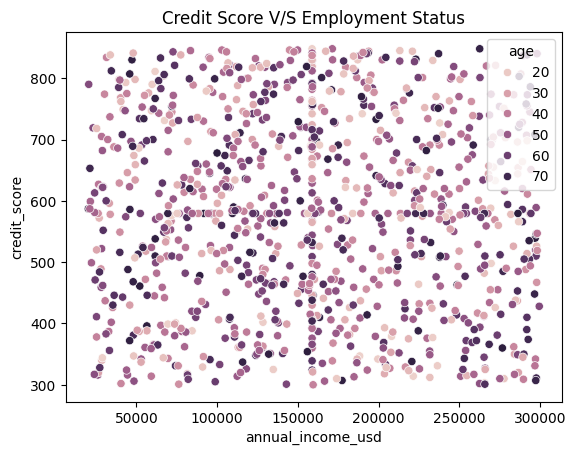

In [ ]:
sns.scatterplot(x='annual_income_usd', y='credit_score',hue='age', data=df_test)
plt.title("Credit Score V/S Employment Status")
plt.show()

####################### Graph Showing Credit Score According To The Employment Status Of The Data #######################


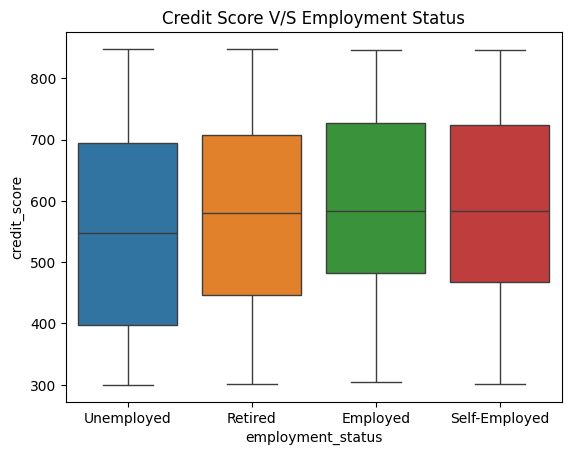

In [ ]:
print("####################### Graph Showing Credit Score According To The Employment Status Of The Data #######################")
sns.boxplot(x='employment_status', y='credit_score',hue='employment_status', data=df)
plt.title("Credit Score V/S Employment Status")
plt.show()

####################### Line Graph Of Credit Score With Respect To Loan Types #######################


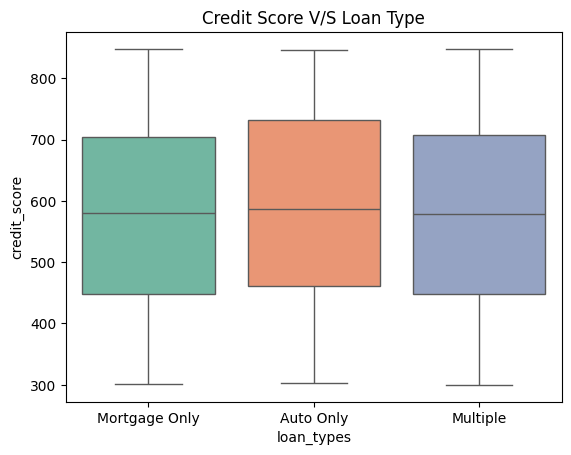

In [ ]:
print("####################### Line Graph Of Credit Score With Respect To Loan Types #######################")
sns.boxplot(x='loan_types', y='credit_score',hue='loan_types',data=df,palette='Set2',legend=False)
plt.title("Credit Score V/S Loan Type")
plt.show()

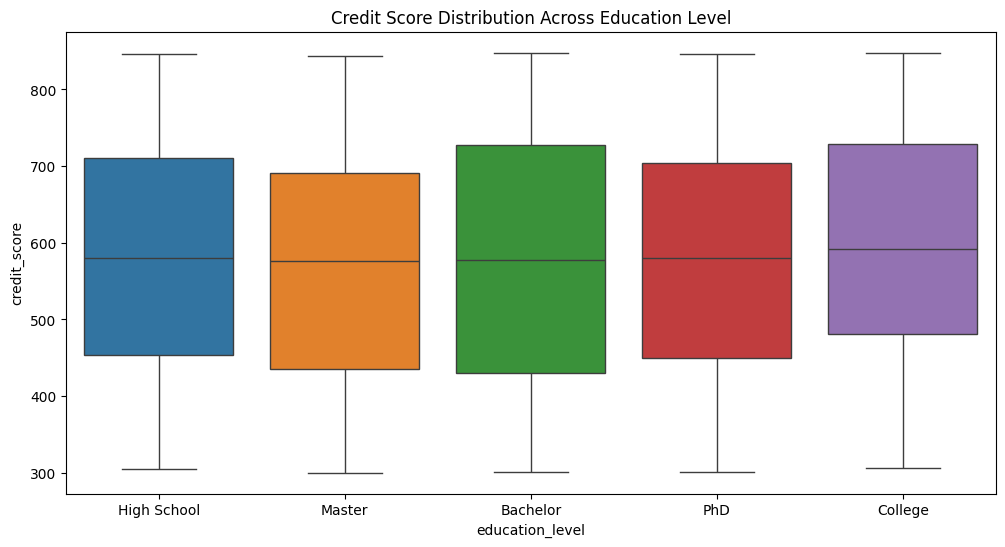

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='education_level', y='credit_score',hue='education_level',data=df)
plt.title("Credit Score Distribution Across Education Level")
plt.show()

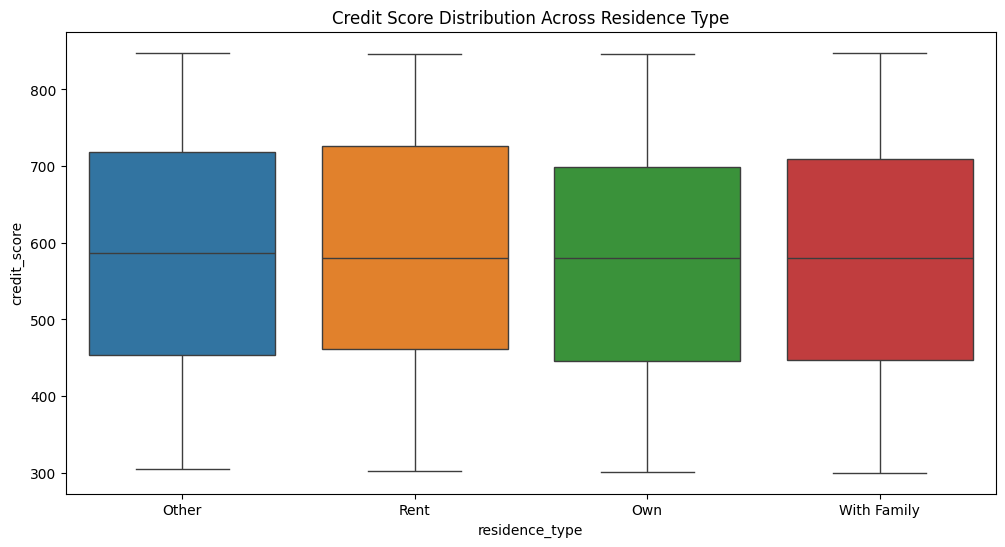

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='residence_type', y='credit_score',hue='residence_type',data=df)
plt.title("Credit Score Distribution Across Residence Type")
plt.show()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Graph Showing Count Of Age Grops %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


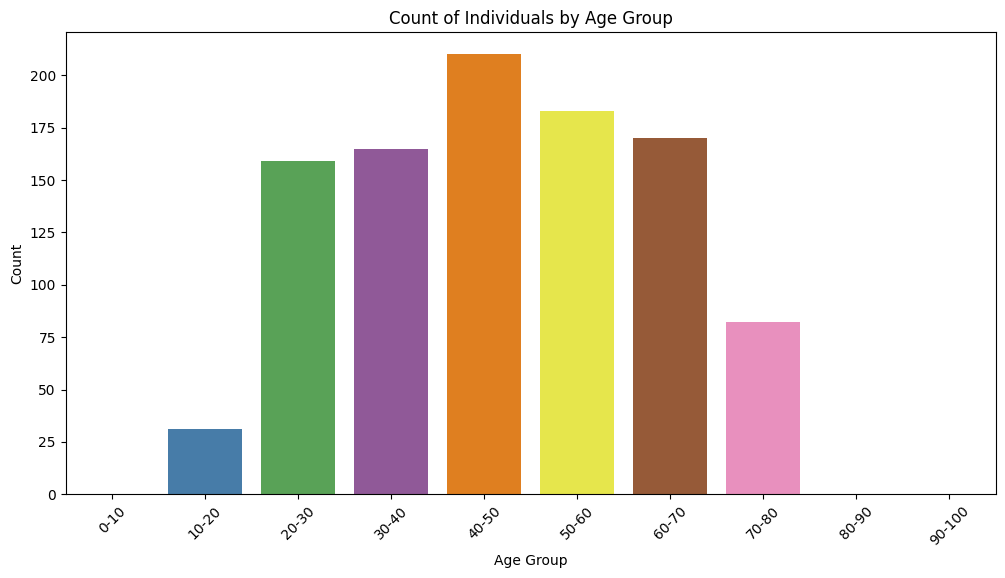

In [ ]:
print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Graph Showing Count Of Age Grops %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
plt.figure(figsize=(12, 6))
sns.countplot(
    x='age_group',
    data=df_test,
    palette='Set1'
)
plt.xticks(rotation=45)
plt.title("Count of Individuals by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ PieChart Of Cibil Category @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


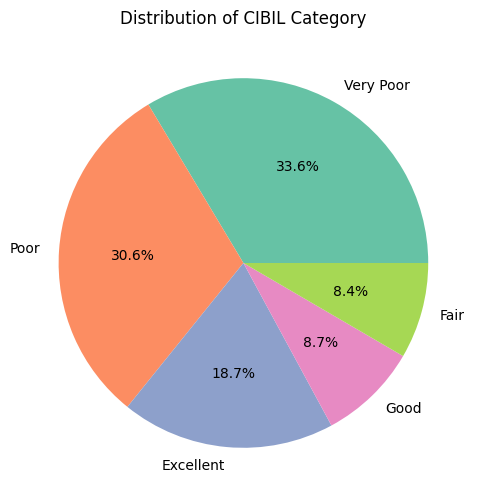

In [ ]:
print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ PieChart Of Cibil Category @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
counts = df_test['cibil_category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=plt.cm.Set2.colors)
plt.title('Distribution of CIBIL Category')
plt.show()

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   annual_income_usd       1000 non-null   float64 
 1   outstanding_debt_usd    1000 non-null   float64 
 2   missed_payments         1000 non-null   float64 
 3   employment_status       1000 non-null   object  
 4   employment_years        1000 non-null   float64 
 5   credit_history_years    1000 non-null   float64 
 6   number_of_credit_cards  1000 non-null   float64 
 7   loan_types              1000 non-null   object  
 8   marital_status          1000 non-null   object  
 9   dependents              1000 non-null   float64 
 10  education_level         1000 non-null   object  
 11  residence_type          1000 non-null   object  
 12  savings_balance         1000 non-null   float64 
 13  age                     1000 non-null   float64 
 14  credit_score            1

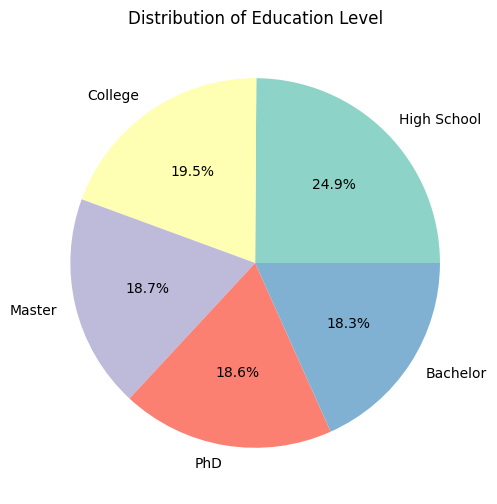

In [ ]:
counts = df_test['education_level'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Education Level')
plt.show()

******************** Graph Showing Showing Credit Score With Respect To The Annual Income(in USD) ********************


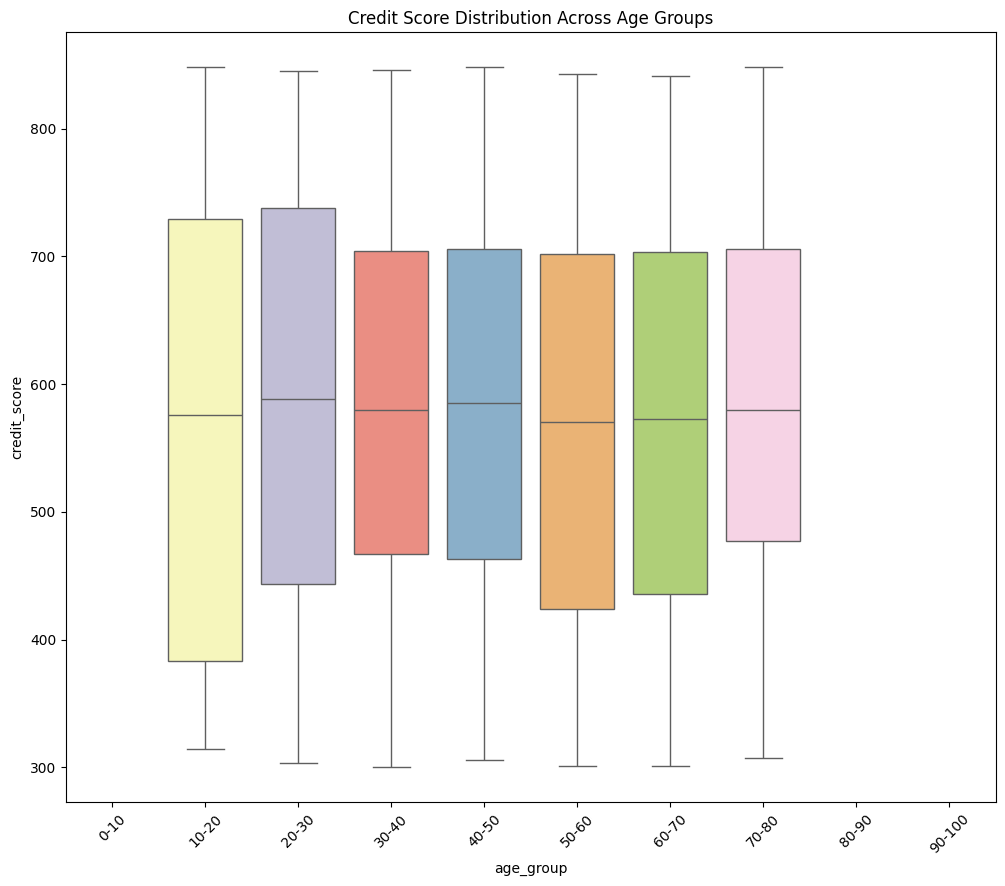

In [ ]:
df_sample = df.sample(100, random_state=42)
print("******************** Graph Showing Showing Credit Score With Respect To The Annual Income(in USD) ********************")
plt.figure(figsize=(12, 10))
sns.boxplot(
    x='age_group',
    y='credit_score',
    #hue='age_group',
    data=df_test,
    palette='Set3',
    legend=False
)
plt.xticks(rotation=45)
plt.title("Credit Score Distribution Across Age Groups")
plt.show()

******************** Graph Showing Showing Credit Score With Number Of Credit Card  ********************


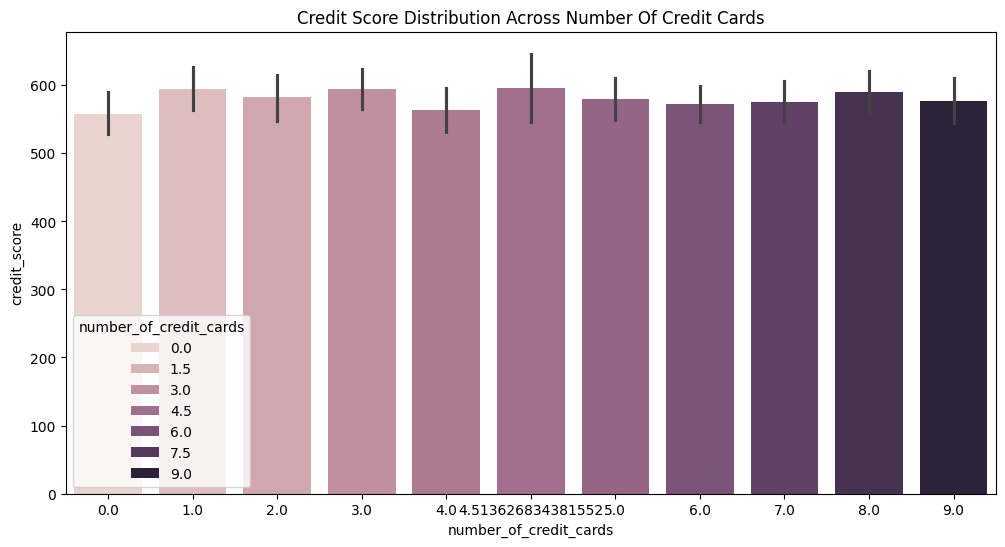

In [ ]:
print("******************** Graph Showing Showing Credit Score With Number Of Credit Card  ********************")
plt.figure(figsize=(12, 6))
sns.barplot(x='number_of_credit_cards', y='credit_score',hue='number_of_credit_cards',data=df)
plt.title("Credit Score Distribution Across Number Of Credit Cards")
plt.show()

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ Graph Showing Realationship Of Age and Credit Score ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


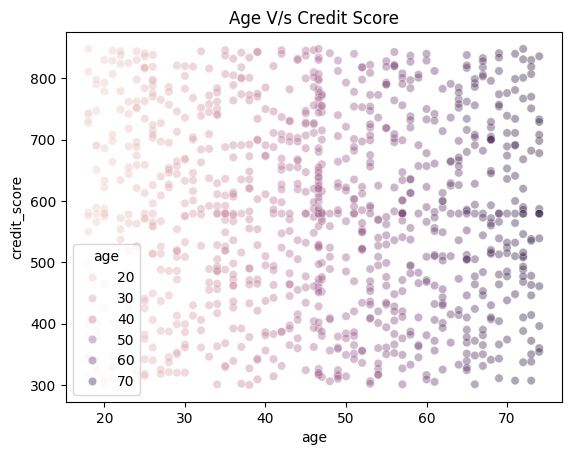

In [ ]:
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ Graph Showing Realationship Of Age and Credit Score ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
sns.scatterplot(
    x='age',
    y='credit_score',
    hue='age',
    data=df,
    alpha=0.4
)
plt.title("Age V/s Credit Score")
plt.show()

***REGRESSION***

**OLS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   annual_income_usd       1000 non-null   float64
 1   outstanding_debt_usd    1000 non-null   float64
 2   missed_payments         1000 non-null   float64
 3   employment_status       1000 non-null   object 
 4   employment_years        1000 non-null   float64
 5   credit_history_years    1000 non-null   float64
 6   number_of_credit_cards  1000 non-null   float64
 7   loan_types              1000 non-null   object 
 8   marital_status          1000 non-null   object 
 9   dependents              1000 non-null   float64
 10  education_level         1000 non-null   object 
 11  residence_type          1000 non-null   object 
 12  savings_balance         1000 non-null   float64
 13  age                     1000 non-null   float64
 14  credit_score            1000 non-null   f

In [ ]:
X=df.drop(['employment_status','loan_types','marital_status','education_level','residence_type','credit_score'],axis=1)
Y=df['credit_score']

In [ ]:
import statsmodels.api as sm

In [ ]:
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           credit_score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6773
Date:                Fri, 13 Feb 2026   Prob (F-statistic):              0.730
Time:                        09:25:00   Log-Likelihood:                -6466.8
No. Observations:                1000   AIC:                         1.295e+04
Df Residuals:                     990   BIC:                         1.300e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    611

In [ ]:
print("Accuracy:",round(model.rsquared*100,4),"%")

Accuracy: 0.6119 %


In [ ]:
df3=pd.get_dummies(df)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   annual_income_usd                1000 non-null   float64
 1   outstanding_debt_usd             1000 non-null   float64
 2   missed_payments                  1000 non-null   float64
 3   employment_years                 1000 non-null   float64
 4   credit_history_years             1000 non-null   float64
 5   number_of_credit_cards           1000 non-null   float64
 6   dependents                       1000 non-null   float64
 7   savings_balance                  1000 non-null   float64
 8   age                              1000 non-null   float64
 9   credit_score                     1000 non-null   float64
 10  employment_status_Employed       1000 non-null   bool   
 11  employment_status_Retired        1000 non-null   bool   
 12  employment_status_Sel

In [ ]:
for feature in df3.columns:
  df3[feature]=df3[feature].astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   annual_income_usd                1000 non-null   float64
 1   outstanding_debt_usd             1000 non-null   float64
 2   missed_payments                  1000 non-null   float64
 3   employment_years                 1000 non-null   float64
 4   credit_history_years             1000 non-null   float64
 5   number_of_credit_cards           1000 non-null   float64
 6   dependents                       1000 non-null   float64
 7   savings_balance                  1000 non-null   float64
 8   age                              1000 non-null   float64
 9   credit_score                     1000 non-null   float64
 10  employment_status_Employed       1000 non-null   float64
 11  employment_status_Retired        1000 non-null   float64
 12  employment_status_Sel

In [ ]:
X=df3.drop('credit_score',axis=1)
Y=df3['credit_score']

In [ ]:
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           credit_score   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Fri, 13 Feb 2026   Prob (F-statistic):              0.406
Time:                        09:25:00   Log-Likelihood:                -6457.2
No. Observations:                1000   AIC:                         1.296e+04
Df Residuals:                     975   BIC:                         1.309e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
print("Accuracy:",round(model.rsquared*100,4),"%")

Accuracy: 2.5025 %


***CLASSIFICATION USIG NEURAL NETWORK***

***MultiLayer Classification***

In [ ]:
df4=df3.copy()

In [ ]:
import pandas as pd

bins = [300, 549, 649, 699, 749, 900]
labels = ['Very Poor', 'Poor', 'Fair', 'Good', 'Excellent']

df4['cibil_category'] = pd.cut(
    df4['credit_score'],
    bins=bins,
    labels=labels,
    right=True
)

In [ ]:
df4['cibil_category'].value_counts().sort_index()

,count
cibil_category,
Very Poor,418
Poor,223
Fair,84
Good,87
Excellent,187


In [ ]:
df4['cibil_category']=df4['cibil_category'].fillna('Very Poor')

In [ ]:
print(df4['cibil_category'].unique())
print("Number of unique values:", df4['cibil_category'].nunique())

['Very Poor', 'Excellent', 'Fair', 'Poor', 'Good']
Categories (5, object): ['Very Poor' < 'Poor' < 'Fair' < 'Good' < 'Excellent']
Number of unique values: 5


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df4['cibil_category'] = le.fit_transform(df4['cibil_category'])

In [ ]:
df4['cibil_category'].value_counts()

,count
cibil_category,
4,419
3,223
0,187
2,87
1,84


In [ ]:
X = df4.drop(['cibil_category','credit_score'], axis=1)
y = df4['cibil_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 29) (800,)
(200, 29) (200,)


In [ ]:
import numpy as np
print(np.unique(y_train))


[0 1 2 3 4]


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3285 - loss: 19340.6094 - val_accuracy: 0.3000 - val_loss: 3684.1392
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2541 - loss: 4240.0693 - val_accuracy: 0.2625 - val_loss: 2529.2534
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2840 - loss: 2321.4512 - val_accuracy: 0.3438 - val_loss: 1738.1316
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2948 - loss: 1378.1506 - val_accuracy: 0.2812 - val_loss: 1186.4849
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2729 - loss: 1186.7626 - val_accuracy: 0.2812 - val_loss: 1153.7830
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3450 - loss: 986.8163 - val_accuracy: 0.3000 - val_loss: 829.7218
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2943 - loss: 809.3694 - val_accuracy: 0.2250 - val_loss: 928.2420
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.271

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc*100,'%')

Test Accuracy: 26.499998569488525 %


#CLASSIFICATION USING ML (RANDOM FOREST)

***MULTILAYER CLASSIFICATION***


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   annual_income_usd                1000 non-null   float64
 1   outstanding_debt_usd             1000 non-null   float64
 2   missed_payments                  1000 non-null   float64
 3   employment_years                 1000 non-null   float64
 4   credit_history_years             1000 non-null   float64
 5   number_of_credit_cards           1000 non-null   float64
 6   dependents                       1000 non-null   float64
 7   savings_balance                  1000 non-null   float64
 8   age                              1000 non-null   float64
 9   credit_score                     1000 non-null   float64
 10  employment_status_Employed       1000 non-null   float64
 11  employment_status_Retired        1000 non-null   float64
 12  employment_status_Sel

In [ ]:
from sklearn.model_selection import train_test_split

X = df4.drop(['cibil_category','credit_score'], axis=1)
y = df4['cibil_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.395
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        17
           3       0.08      0.02      0.04        45
           4       0.43      0.93      0.59        84

    accuracy                           0.40       200
   macro avg       0.10      0.19      0.12       200
weighted avg       0.20      0.40      0.25       200



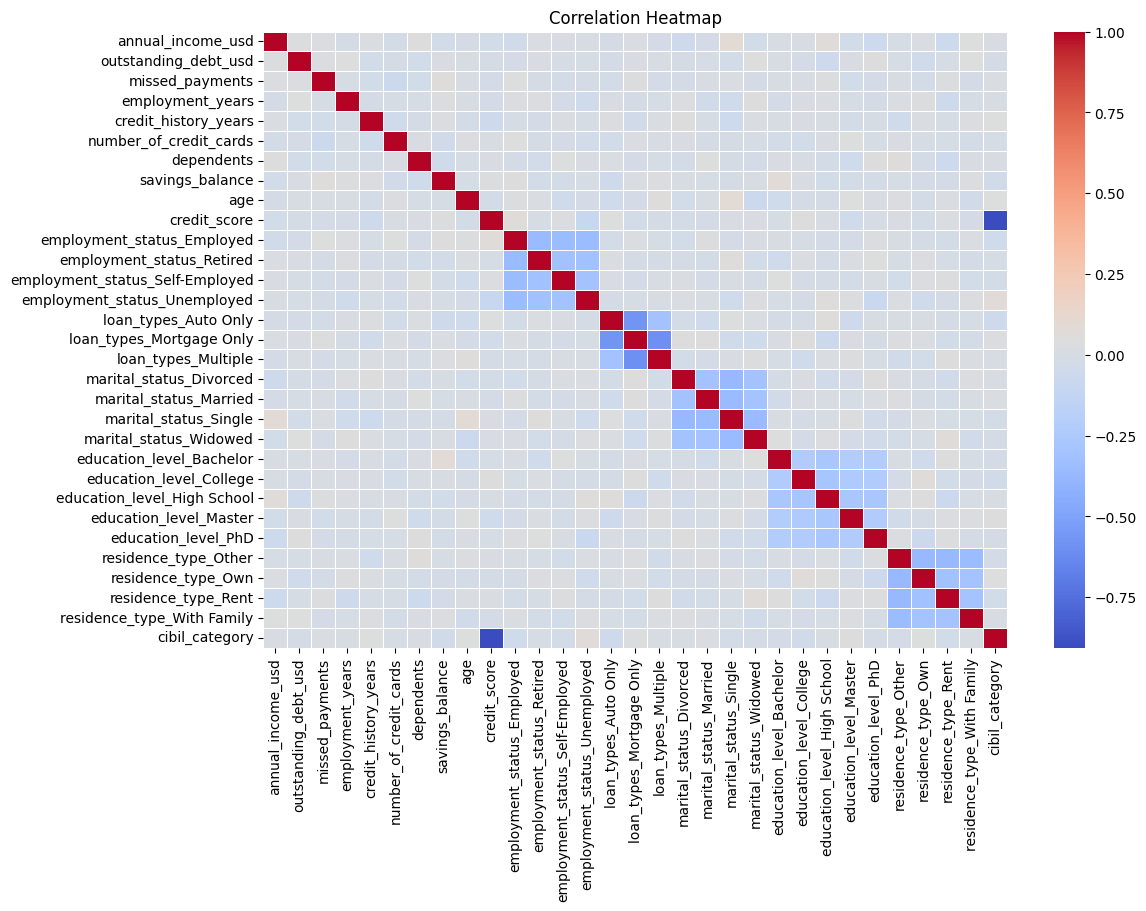

In [ ]:
corr_matrix=df4.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
num_col=df.select_dtypes(include=np.number).columns

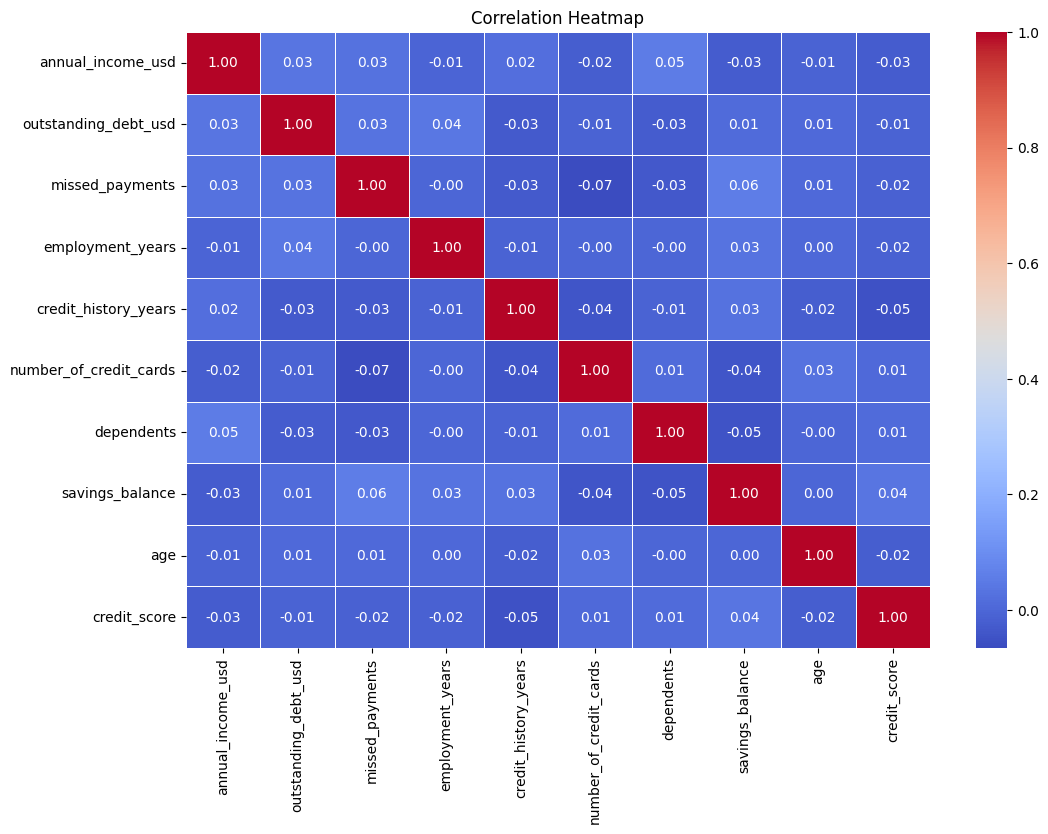

In [ ]:
corr_matrix=df[num_col].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

#UI INTERFACE FOR THE USER

In [ ]:
!pip install gradio

In [ ]:
import joblib
joblib.dump(model, "credit_model.pkl")

['credit_model.pkl']

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   annual_income_usd                1000 non-null   float64
 1   outstanding_debt_usd             1000 non-null   float64
 2   missed_payments                  1000 non-null   float64
 3   employment_years                 1000 non-null   float64
 4   credit_history_years             1000 non-null   float64
 5   number_of_credit_cards           1000 non-null   float64
 6   dependents                       1000 non-null   float64
 7   savings_balance                  1000 non-null   float64
 8   age                              1000 non-null   float64
 9   credit_score                     1000 non-null   float64
 10  employment_status_Employed       1000 non-null   float64
 11  employment_status_Retired        1000 non-null   float64
 12  employment_status_Sel

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

print(importance.head(10))

outstanding_debt_usd      0.093889
savings_balance           0.091246
annual_income_usd         0.089756
employment_years          0.089199
credit_history_years      0.088673
age                       0.081649
missed_payments           0.070442
number_of_credit_cards    0.061544
dependents                0.051076
residence_type_Other      0.016676
dtype: float64


In [ ]:
top_features = importance.head(6).index.tolist()

X_new = df4[top_features]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_reg = df4[top_features]
y_reg = df4['credit_score']

model_reg = RandomForestRegressor(random_state=42)
model_reg.fit(X_reg, y_reg)

RandomForestRegressor(random_state=42)

In [ ]:
def get_category(score):
    if score < 550:
        return "Very Poor"
    elif score < 650:
        return "Poor"
    elif score < 700:
        return "Fair"
    elif score < 750:
        return "Good"
    else:
        return "Excellent"

In [ ]:
def predict_credit(*inputs):
    input_array = np.array(inputs).reshape(1, -1)
    prediction = model_reg.predict(input_array)
    score = round(prediction[0])
    category = get_category(score)

    return score, category

In [ ]:
label_map = {
    "outstanding_debt_usd": "Outstanding Debt (USD)",
    "savings_balance": "Savings Balance (USD)",
    "annual_income_usd": "Annual Income (USD)",
    "employment_years": "Employment Years",
    "credit_history_years": "Credit History (Years)",
    "age": "Age"
}
top_features = list(label_map.keys())

inputs = [
    gr.Number(label=label_map[col])
    for col in top_features
]

In [ ]:
custom_css = """
body {
    background-color: #121212 !important;
}

/* Main container */
.gradio-container {
    background-color: #121212 !important;
    color: white !important;
}

/* Title & description */
h1, h2, h3, p {
    color: white !important;
}

/* Input cards white */
.gr-box {
    background-color: white !important;
    color: black !important;
    border-radius: 10px !important;
}

label {
    color: #d32f2f !important;
    font-weight: 700;
}

/* Button styling */
.gr-button {
    background-color: #1f4ed8 !important;
    color: white !important;
    border-radius: 8px !important;
    font-weight: bold;
}

.gr-button:hover {
    background-color: #1e40af !important;
}
"""

In [ ]:
interface = gr.Interface(
    fn=predict_credit,
    inputs=inputs,
    outputs=[
        gr.Number(label="Predicted Credit Score"),
        gr.Textbox(label="Credit Category")
    ],
    title="Sangamesh 💳 Credit Risk Prediction System",
    description="""
This Credit Risk Prediction System is developed for academic purposes using synthetic (dummy) financial data.
The model predicts a credit score based on user financial inputs and classifies it into risk categories.
Note: Since the dataset is synthetic, predictions may not reflect real-world credit bureau evaluations.
""",

    theme=gr.themes.Base(primary_hue="blue"),
    css=custom_css
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://10e61c77945631d03e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
